# Tutorial 2 - Gradient Descent & Cost Function

## What is gradient descent

Gradient descent is a widely used optimization algorithm in machine learning and deep learning that minimises the cost function of a neural network model during training to find the optimal parameters, `weights` and `biases`, in a linear regression model.

Linear regression is a supervised algorithm that draws a linear relationship model between independent variables (inputs, sometimes it is called regressors or predictors) and the dependent variable (output or outcome).

In simple words, the linear regression is to find the line that fits the observed data and use it to predict the future outcome from new inputs or unseen data. The observed data can be a historical data that has been collected for a specific purpose within a certain duration.

The simple Linear regression consists of only one independent variable (x) and one dependent variable (y), as illustrated in the following figure.

<img src="2-linear-regression.jpg">

What we actually do in Linear regression is to find the best parameters that fits the straight line to the observations by minimizing the errors between the predicted outcomes and the observations. Meaning that, the best model in linear regression is the linear equation model with the best parameters.

The figure above describes the simple Linear regression problem. The red line is called the regression line, which is the line that best fits the given observations that can be used to predict the unseen inputs.

Now, you already know what the regression problem is, which is the problem of how to obtain the best parameters in order to have the stright line representing the best relationship between the input and the outcome. Cool! so now let’s look at the following figure.

<img src="2-linear-regression-fitting.png">

We define the prediction_function `y = w * x + b`, herein
- x is the independent variable
- y is the dependent variable
- w is the weight associated with input variable
- b is the bias

The cost function is used to calculate the loss based on the predictions made. In linear regression, we use mean squared error to calculate the loss. Mean Squared Error is the sum of the squared differences between the actual and predicted values.

$$J = \frac{\sum_{i=1}^n (y_i - (w*x_i + b))^2}{n}$$

repeat the following steps until convergence, or until reach the minimum.
```c
{
    w = w - learning_rate * dJ/dw
    b = b - learning_rate * dJ/db
}
```

<img src="2-gradient-descent-minimum.jpg">

<img scr="gradient0-descent-minimum.jpg">

## Implmentation of Python algorithm for gradient descent

In [28]:
# imports

import numpy as np
import matplotlib.pyplot as plt

In [29]:
# generate random dataset

np.random.seed(202501)
X = np.random.rand(16, 1)
Y = 2.0 + 3.0 * X + np.random.rand(16, 1)

print("X = ", X, '\n\n', "Y = ", Y)

X =  [[0.59105108]
 [0.62737055]
 [0.11168025]
 [0.85720011]
 [0.1414831 ]
 [0.95107392]
 [0.58381903]
 [0.60433405]
 [0.81504465]
 [0.12582122]
 [0.73148198]
 [0.85632946]
 [0.50612028]
 [0.13257988]
 [0.40788684]
 [0.26405048]] 

 Y =  [[3.82726456]
 [4.50271472]
 [3.24137534]
 [4.77726882]
 [2.89862081]
 [5.34685013]
 [4.37415741]
 [4.34463305]
 [4.60336393]
 [3.10673918]
 [5.18317994]
 [4.99616224]
 [3.62674879]
 [2.52089828]
 [3.79742524]
 [3.23505098]]


In [30]:
# x is a column vector of size 16x1 and y is also a column vector of size 16x1.

print("shape of X =", X.shape)

shape of X = (16, 1)


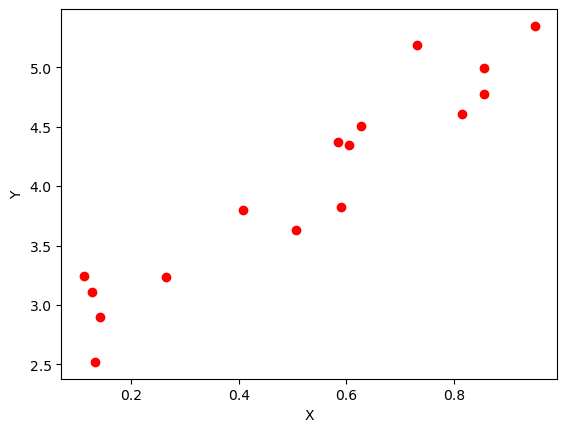

In [31]:
# plot the data

%matplotlib inline
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(X, Y, color='r')
plt.show()

In [32]:
# mean square error is also called cost function

def mean_square_error(y_true, y_predicted):
    cost = np.sum((y_true - y_predicted)**2)/len(y_true)
    return cost

In [33]:
# gradient descent function

def gradient_descent(X, Y, learning_rate=0.005, num_iterations=10000):
    stop_threshold = 1e-6
    weight_curr = 0
    bias_curr = 0
    n = len(X)
    costs = []
    weights = []
    cost_curr = 0.0
    cost_prev = None
    for i in range(num_iterations):
        y_predicted = weight_curr * X + bias_curr
        
        # cal cost
        # cost = (1/n)*sum([val**2 for val in (y - y_predicted)])
        cost_curr = mean_square_error(Y, y_predicted)

        if cost_prev and abs(cost_curr - cost_prev) <= stop_threshold:
            print(f"Iteration {i+1}: Cost (curr) = {cost_curr}, Cost (prev) = {cost_prev}")
            break

        cost_prev = cost_curr

        costs.append(cost_curr)
        weights.append(weight_curr)

        # cal gradients
        weight_derivative = -(2/n) * sum(X * (Y - y_predicted))
        bias_derivative = -(2/n) * sum(Y - y_predicted)
        
        # update weights and bias
        weight_curr = weight_curr - learning_rate * weight_derivative
        bias_curr = bias_curr - learning_rate * bias_derivative

        # print parameters at each 1000 steps
        if i % 1000 == 0:
            print(f"Iteration {i+1}: Cost = {cost_curr}, Weight = {weight_curr}, Bias = {bias_curr}")

    # Visualize weights and cost for all iterations
    plt.figure(figsize=(9,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker = 'o', color = 'red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weights")
    plt.show()

    return weight_curr, bias_curr

Iteration 1: Cost = 16.89469444406165, Weight = [0.02312767], Bias = [0.04023903]
Iteration 1001: Cost = 0.0987882923767345, Weight = [2.24150014], Bias = [2.8799345]
Iteration 2001: Cost = 0.07941553810090544, Weight = [2.50954942], Bias = [2.73165626]
Iteration 3001: Cost = 0.07375121466009049, Weight = [2.6544888], Bias = [2.65147419]
Iteration 3862: Cost (curr) = 0.07222260599679632, Cost (prev) = 0.07222360497559753


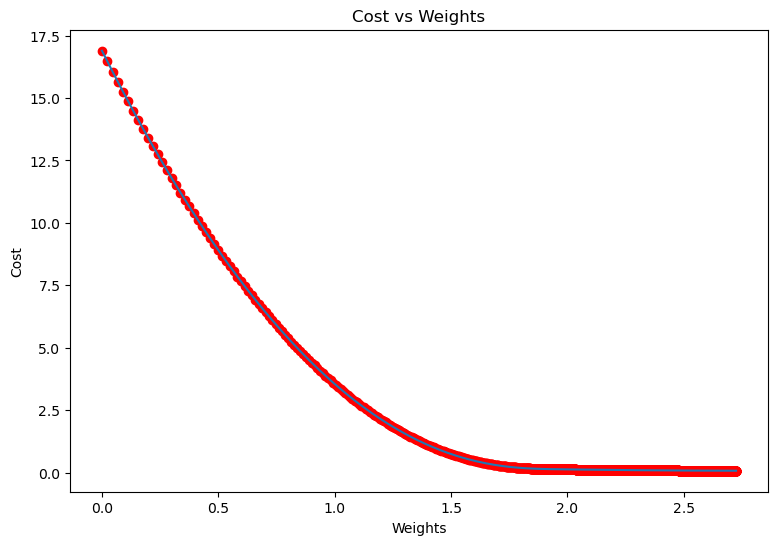

In [34]:
weight_final, bias_final = gradient_descent(X, Y)

In [35]:
print(f"Fitted weight and bias are {weight_final} and {bias_final}")

Fitted weight and bias are [2.72456702] and [2.61270613]


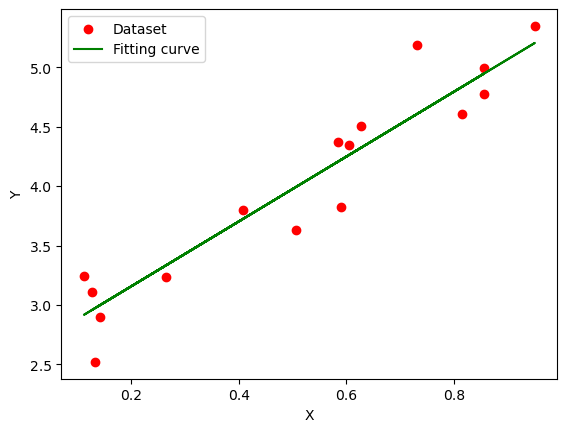

In [36]:
# plot the data

plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(X, Y, color='r')

y_predicted = weight_final * X + bias_final
plt.plot(X, y_predicted, color='g')

plt.legend(["Dataset", "Fitting curve"])
plt.show()